# TP2 - segmentation -
## M2 TSI – année 2024/2025

**Introduction :**
Cette série de travaux pratiques a pour but de mettre en pratique les connaissances acquises pendant le cours de segmentation d’images.
Les codes sources devront être écrits en python, et s’appuieront sur la bibliothèque de traitement d’images OpenCV.

**Objectif du TP :** Appliquer ou programmer des fonctions basiques et avancées de segmentation d’images (par des approches d’extraction de contours).

**Exercice 1 :**

Appliquer l’algorithme des K-means d’openCV sur un tableau contenant les intensités des pixels de l'image.
Afficher sur l’histogramme de l'image, les centres des classes trouvés et les variances trouvées (sous formes de courbes gaussiennes).
Utiliser cet algorithme pour afficher une segmentation de l'image en K classes (K labels).
Tester plusieurs valeurs de K pour l’image des grains et comparer à la méthode d’Otsu.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

labels, centers [[1]
 [6]
 [9]
 ...
 [4]
 [4]
 [4]] [[151.85814 ]
 [132.08534 ]
 [ 69.96365 ]
 [ 84.92807 ]
 [ 52.716022]
 [112.95364 ]
 [105.007454]
 [191.1345  ]
 [174.03851 ]
 [ 97.389915]]
segemented_img [[132 105  97 ... 105 105 112]
 [105  97  97 ...  97  97 105]
 [105 105  84 ...  97  97 105]
 ...
 [ 52  52  52 ...  52  52  52]
 [ 69  52  52 ...  69  69  69]
 [ 69  52  52 ...  52  52  52]]


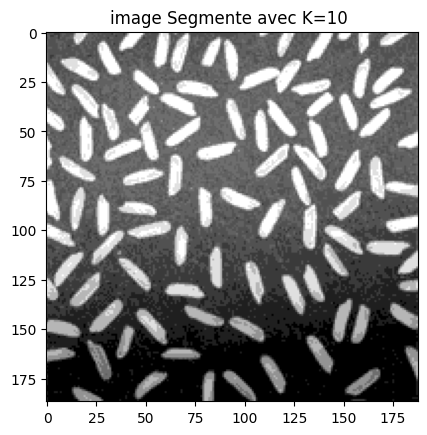

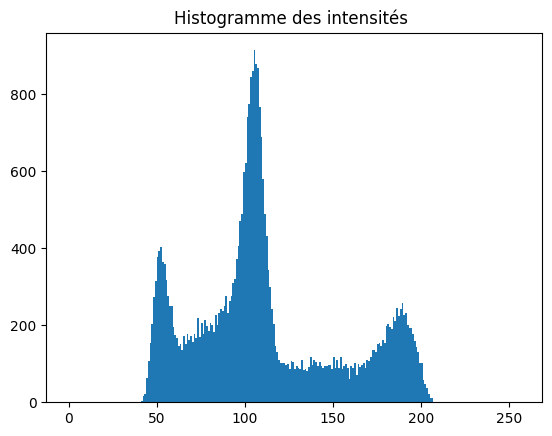

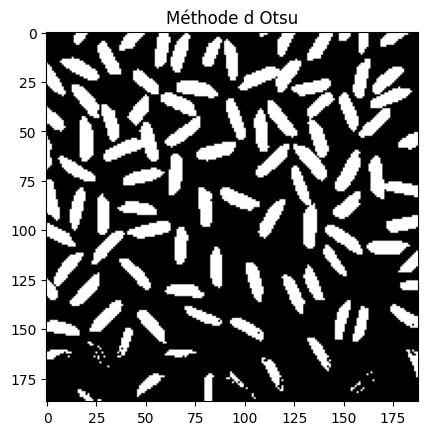

In [ ]:
#lire l'image
image = cv2.imread("/content/drive/MyDrive/images_TP1 (1)/grains.png")

#convertir l'image en nv de gris

gray_img = cv2.cvtColor  (image, cv2.COLOR_BGR2GRAY)

#Application de K_menas :

pixels = gray_img.reshape((-1,1))

pixels = np.float32(pixels)
#print('pixels', pixels)


K = 10
_, labels, centers = cv2.kmeans(pixels, K, None, (cv2.TERM_CRITERIA_MAX_ITER, 100, 0), 10, cv2.KMEANS_RANDOM_CENTERS)
print('labels, centers',labels, centers)

centers = np.uint8(centers)

segemented_img = centers[labels.flatten()]
segemented_img = segemented_img.reshape(gray_img.shape)
print('segemented_img',segemented_img)


# Affichage
plt.imshow(segemented_img, cmap='gray')
plt.title(f'image Segmente avec K=10 ')
plt.show()


plt.hist(gray_img.flatten(), bins=256, range=[0, 256])
plt.title('Histogramme des intensités ')
plt.show()


# la méthode d'Otsu
_, otsu_threshold = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.imshow(otsu_threshold, cmap='gray')
plt.title('Méthode d Otsu')
plt.show()

In [ ]:
# K-means et Otsu fonctionnent généralement sur des images en niveaux de gris
#l'image segmenté avec kmeans montre une partition de l'image en plusieure régions baseés sur les intensités des pixels
# Avec k = 2 : on remarque une image avec deux classes blanches (les grains) et et noires (le fond),les grains semblent encore assez mal définis,
# l'algorithme n'a pas suffisamment de classes pour capturer les différentes variations dans l'image,
# K = 5 : l'image est divisé en cinq classe, on remarque une amélioration notable par rapport à K=2, l'augmentation de K permet
# une segmentation plus fine, mais certaines parties de l'image restent floues
# k = 10 :  permet de mieux capturer les détail des grains , ou chaque grain est mieux défini avec un peu de variation


In [ ]:
# Comparaison :
#la methode d'otsu : elle produit une segmentation binaire et nette , elle separe les grains et le fond en deux classe,
# on remarque que les grains sont bien distingués du fond mais ne capture pas les détails internes des grains.
# par contre la methode de k_means  plus K augment capture plus de détails
# Donc c'est  pour une segmentation rapide et efficace des grains, Otsu est suffisant
# pour une segmentation plus précise et détaillée K-means avec un K adapté , car elle permet d'obtenir une segmentation plus détaillée

Préambule :
Un contour est caractérisé par une transition plus ou moins brutale des niveaux de gris d’une image. L’analyse du vecteur gradient permet de mettre en évidence un contour. En effet l’amplitude du gradient indique une discontinuité plus ou moins forte et sa direction est par définition normale au contour. Le gradient est un opérateur directionnel.

**Exercice 2 :** Seuillage par recherche des maxima dans la direction du gradient) :

Sur une image en niveau de gris, appliquer les opérateurs de Sobel. Par cette approche, le calcul du gradient est estimé par l'intermédiaire de deux masques, le premier effectuant un gradient horizontal, le second un gradient vertical.
Calculer la norme du gradient (module ou magnitude du vecteur) et appliquer un seuillage local par extraction des maxima du gradient dans la direction du gradient (phase du vecteur).
Afficher les résultats de l'ensemble des étapes dans des fenêtres openCV.
Appliquer sur ce résultat le seuillage par hystérésis (TP1) pour obtenir des contours propres.

- http://www.optique-ingenieur.org/fr/cours/OPI_fr_M04_C05/co/Contenu_07.html
- https://www.f-legrand.fr/scidoc/docmml/image/filtrage/bords/bords.html


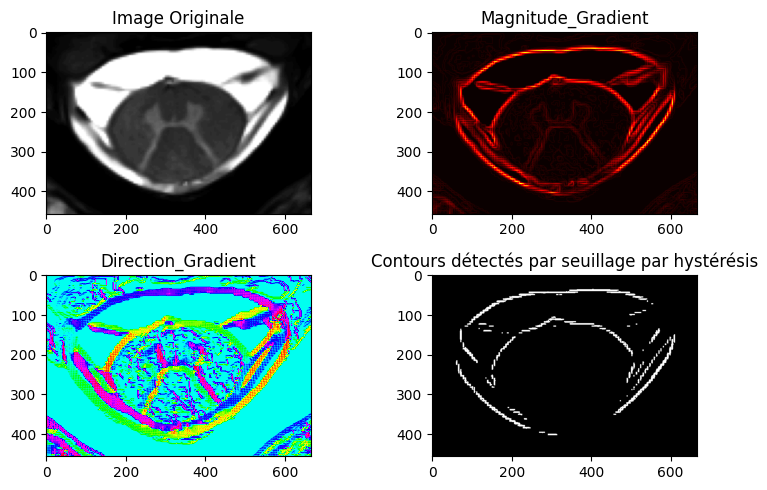

In [ ]:

image = cv2.imread('/content/drive/MyDrive/images_TP1 (1)/moelle.png', cv2.IMREAD_GRAYSCALE)


sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient horizontal (X)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient vertical (Y)

# la magnitude du gradient
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# la direction du gradient
direction = np.arctan2(sobel_y, sobel_x) * 180 / np.pi  # Direction en degrés

threshold_low = 20
threshold_high = 50


edges = np.zeros_like(image, dtype=np.uint8)

# les pixels avec un gradient plus élevé que le seuil élevé comme contours forts
strong_edges = magnitude > threshold_high
edges[strong_edges] = 255

# les pixels avec un gradient entre les seuils bas et élevés comme contours faibles
weak_edges = (magnitude >= threshold_low) & (magnitude <= threshold_high)

# Connecter les bords faibles aux bords forts
for i in range(1, magnitude.shape[0]-1):
    for j in range(1, magnitude.shape[1]-1):
        if weak_edges[i, j]:

            if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                edges[i, j] = 255

#Affichage
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')

plt.subplot(2, 2, 2)
plt.imshow(magnitude, cmap='hot')
plt.title('Magnitude_Gradient')

plt.subplot(2, 2, 3)
plt.imshow(direction, cmap='hsv')
plt.title('Direction_Gradient')

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title('Contours détectés par seuillage par hystérésis')

plt.tight_layout()
plt.show()


In [ ]:
#Magnitude du Gradient dans l'image montre ou il y les changments d'intensité les plus import ce qui correspond aux  bords
#Direction du Gradient montre l'orientation des changements d'intensité donc la direction dans laquelle les bords sont détectés
#(Les différentes couleurs montrent la direction de ces variations)
# Contours détectés par le seuillage par hystérésis : Cette image montre les contours finaux après l'application du seuillage par hystérésis.
#En reliant les bords faibles aux bords forts, l'algorithme détecte les contours les plus importants


**Exercice 3 :** Filtre de Canny :
Sur une image en niveau de gris, appliquer le filtre de Canny implémenté dans openCV avec un seuil haut paramétrable.
Comparer le résultat obtenu avec celui obtenu dans l'exercice 2.

- https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html
- https://medium.com/@rohit-krishna/coding-canny-edge-detection-algorithm-from-scratch-in-python-232e1fdceac7
- https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123


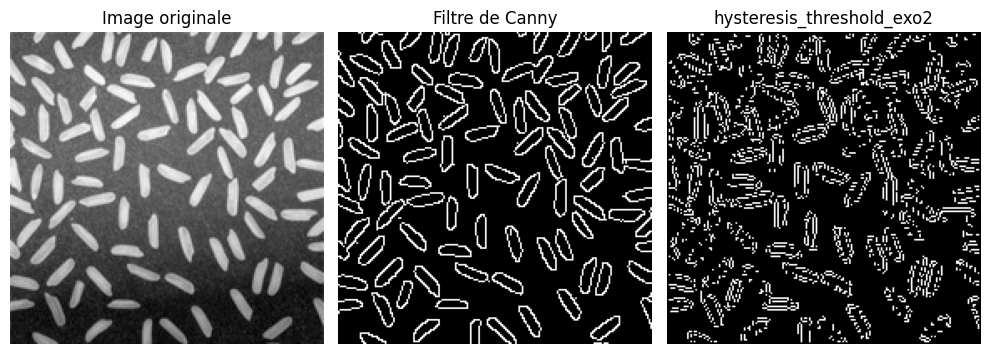

In [ ]:
image = cv2.imread("/content/drive/MyDrive/images_TP1 (1)/grains.png", cv2.IMREAD_GRAYSCALE)

# Appliquer le filtre de Canny
low_threshold = 60
high_threshold = 170
canny_result = cv2.Canny(image, low_threshold, high_threshold)


def gradient_direction(gx, gy):
    return np.arctan2(gy, gx)

def non_maximum_suppression(gradient, direction):
    rows, cols = gradient.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)

    angle = direction * 180.0 / np.pi  # Convertir en degrés
    angle[angle < 0] += 180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q = gradient[i, j + 1]
                r = gradient[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                q = gradient[i + 1, j - 1]
                r = gradient[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                q = gradient[i + 1, j]
                r = gradient[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                q = gradient[i - 1, j - 1]
                r = gradient[i + 1, j + 1]

            if gradient[i, j] >= q and gradient[i, j] >= r:
                suppressed[i, j] = gradient[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

def hysteresis_threshold(image, low_thresh, high_thresh):
    weak = 70
    strong = 200

    result = np.zeros_like(image, dtype=np.uint8)
    strong_pixels = (image >= high_thresh)
    weak_pixels = ((image >= low_thresh) & (image < high_thresh))

    result[strong_pixels] = strong
    result[weak_pixels] = weak

    rows, cols = image.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if result[i, j] == weak:
                if np.any(result[i-1:i+2, j-1:j+2] == strong):
                    result[i, j] = strong
                else:
                    result[i, j] = 0

    return result

# Calcul des gradients
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

magnitude = cv2.magnitude(grad_x, grad_y).astype(np.uint8)
direction = gradient_direction(grad_x, grad_y)

# Non-Maximum Suppression
suppressed = non_maximum_suppression(magnitude, direction)

# Seuillage par hystérésis
final_contours = hysteresis_threshold(suppressed, low_threshold, high_threshold)

# Affichage
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title("Image originale")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Filtre de Canny")
plt.imshow(canny_result, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("hysteresis_threshold_exo2")
plt.imshow(final_contours, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#On remarque que Canny donne des contours clairs et propres parfait pour détecter uniquement les bordures des objets;
#par rapport a Hysteresis Threshold qui donne plus de détails mais introduit plus de bruit


**Exercice 4 :** Opérateurs de morphologie mathématique et étiquetage en composantes connexes

Sur l'image en niveau de gris des grains, développer un algorithme de segmentation d'images qui permet de compter le nombre de grains de riz présents dans l'image.

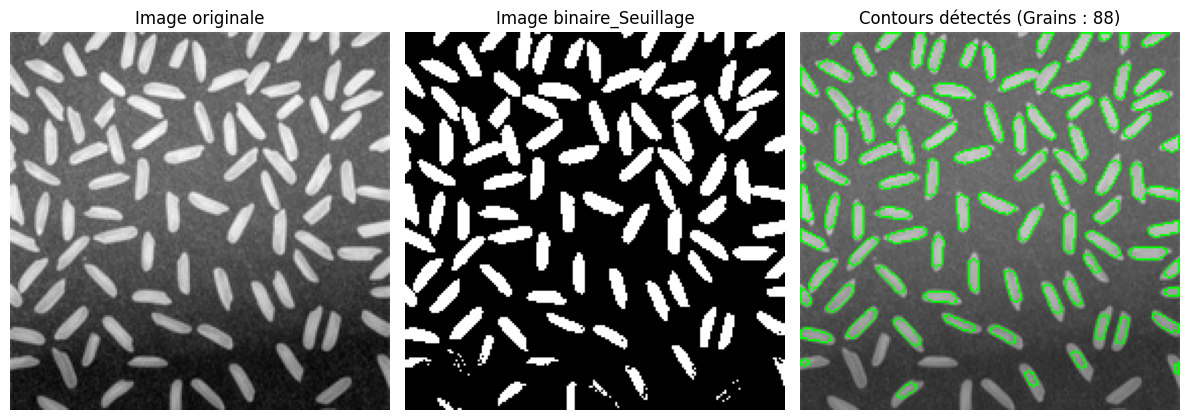

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/images_TP1 (1)/grains.png', cv2.IMREAD_GRAYSCALE)

#  Seuillage par Otsu
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphologie mathématique pour isoler les grains
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

#  Étiquetage des composantes connexes
num_labels, labels_image = cv2.connectedComponents(cleaned_image)

output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convertir en RGB
for label in range(1, num_labels):  # Ignorer le fond (label 0)
    mask = np.uint8(labels_image == label) * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(output_image, contours, -1, (0, 255, 0), 1)

# Affichage
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Image originale")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image binaire_Seuillage")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Contours détectés (Grains : {num_labels - 1})")
plt.imshow(output_image)
plt.axis('off')

plt.tight_layout()
plt.show()